In [61]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [62]:
zip_filename = 'traffic_sign_data.zip' 

if not os.path.exists('data'):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('data')
    print("Extraction complete.")


In [63]:
classes = {0:'Speed limit (20km/h)',
           1:'Speed limit (30km/h)', 
           2:'Speed limit (50km/h)', 
           3:'Speed limit (60km/h)', 
           4:'Speed limit (70km/h)', 
           5:'Speed limit (80km/h)', 
           6:'End of speed limit (80km/h)', 
           7:'Speed limit (100km/h)', 
           8:'Speed limit (120km/h)', 
           9:'No passing', 
           10:'No passing veh over 3.5 tons', 
           11:'Right-of-way at intersection', 
           12:'Priority road', 
           13:'Yield', 
           14:'Stop', 
           15:'No vehicles', 
           16:'Veh > 3.5 tons prohibited', 
           17:'No entry', 
           18:'General caution', 
           19:'Dangerous curve left', 
           20:'Dangerous curve right', 
           21:'Double curve', 
           22:'Bumpy road', 
           23:'Slippery road', 
           24:'Road narrows on the right', 
           25:'Road work', 
           26:'Traffic signals', 
           27:'Pedestrians', 
           28:'Children crossing', 
           29:'Bicycles crossing', 
           30:'Beware of ice/snow', 
           31:'Wild animals crossing', 
           32:'End speed + passing limits', 
           33:'Turn right ahead', 
           34:'Turn left ahead', 
           35:'Ahead only', 
           36:'Go straight or right', 
           37:'Go straight or left', 
           38:'Keep right', 
           39:'Keep left', 
           40:'Roundabout mandatory', 
           41:'End of no passing', 
           42:'End no passing veh > 3.5 tons'}

In [74]:
train_df = pd.read_csv('data/Train.csv')
test_df = pd.read_csv('data/Test.csv')
train_df['Path'] = 'data/' + train_df['Path']
test_df['Path'] = 'data/' + test_df['Path']

train_df['ClassId'] = train_df['ClassId'].astype(int)
train_df['ClassName'] = train_df['ClassId'].map(classes)

In [ ]:
##EDA

In [65]:
# 1. Check for missing values (Rubric requirement)
print(f"Missing values:\n{train_df.isnull().sum()}")

Missing values:
Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


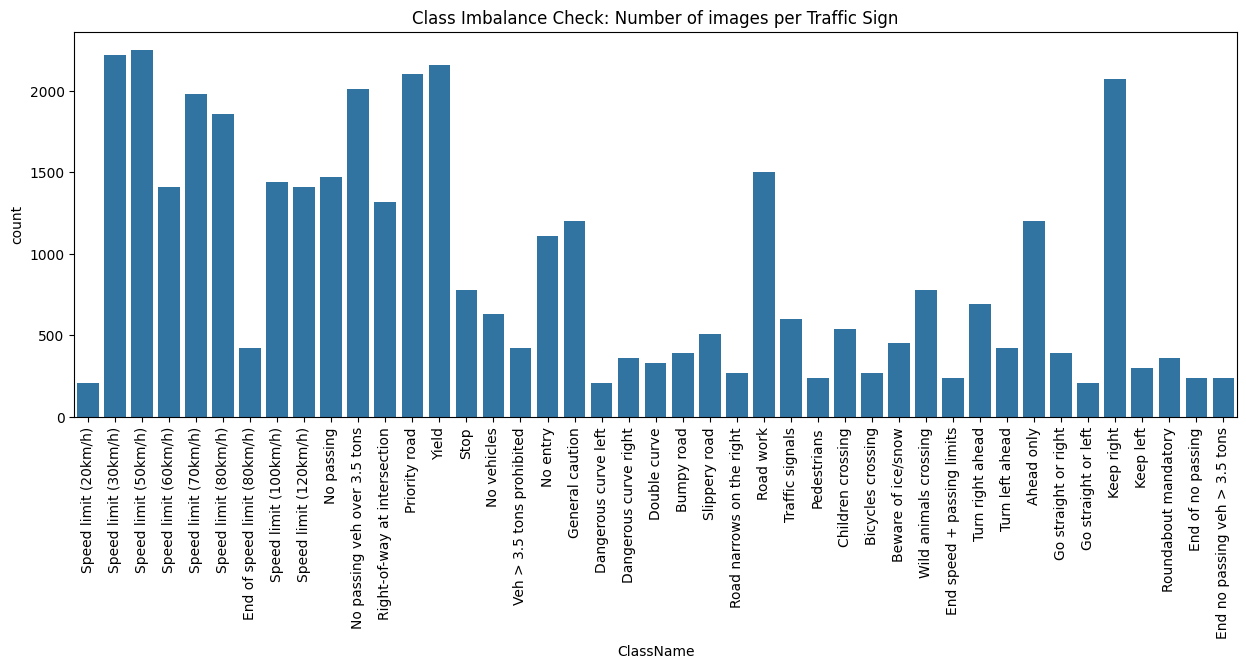

In [78]:
# 2. Analysis of Target Variable (Class Distribution)
plt.figure(figsize=(15, 5))
sns.countplot(x='ClassName', data=train_df, order=list(classes.values()))
plt.title('Class Imbalance Check: Number of images per Traffic Sign')
plt.xticks(rotation=90)
plt.show()

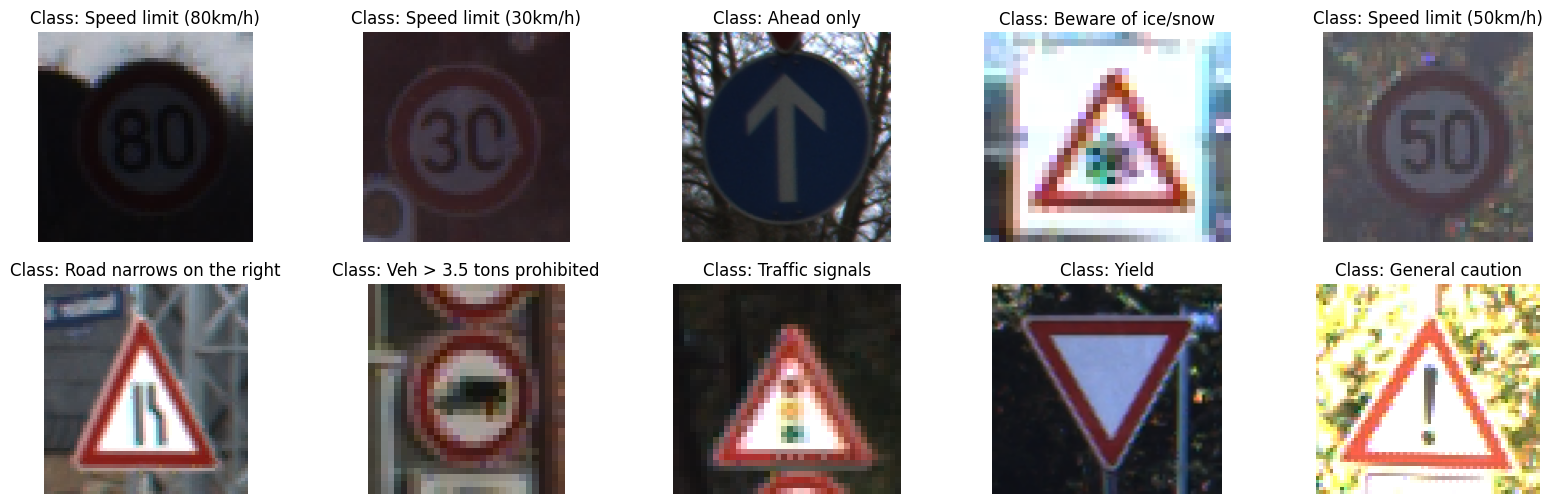

In [81]:
# 3. Content Analysis: Visualize 5 random signs
plt.figure(figsize=(20, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = train_df.sample(1)
    img = Image.open(sample['Path'].values[0])
    plt.imshow(img)
    plt.title(f"Class: {sample['ClassName'].values[0]}")
    plt.axis('off')
plt.show()

In [26]:
# 4. Feature Analysis: Image Width/Height ranges
print(f"Width Range: {train_df.Width.min()} to {train_df.Width.max()}")

Width Range: 25 to 243


In [ ]:
# Split the train dataset to train_set and val_set

In [82]:
train_set, val_set = train_test_split(train_df, test_size=0.2, stratify=train_df['ClassId'], random_state=42)

In [83]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['ClassId']), y=train_df['ClassId'])
weights_dict = {i: w for i, w in enumerate(weights)}

In [84]:
print(train_set.info())
print(val_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31367 entries, 19308 to 16219
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Width      31367 non-null  int64 
 1   Height     31367 non-null  int64 
 2   Roi.X1     31367 non-null  int64 
 3   Roi.Y1     31367 non-null  int64 
 4   Roi.X2     31367 non-null  int64 
 5   Roi.Y2     31367 non-null  int64 
 6   ClassId    31367 non-null  int64 
 7   Path       31367 non-null  object
 8   ClassName  31367 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 31217 to 19586
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Width      7842 non-null   int64 
 1   Height     7842 non-null   int64 
 2   Roi.X1     7842 non-null   int64 
 3   Roi.Y1     7842 non-null   int64 
 4   Roi.X2     7842 non-null   int64 
 5   Roi.Y2     7842 non-null 

In [85]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=12,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.5, 1.5]
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [87]:
train_gen = train_datagen.flow_from_dataframe(train_set, x_col='Path', y_col='ClassId', target_size=(32,32), batch_size=32, class_mode='raw')
val_gen = val_datagen.flow_from_dataframe(val_set, x_col='Path', y_col='ClassId', target_size=(32,32), batch_size=32, class_mode='raw')

Found 31367 validated image filenames.
Found 7842 validated image filenames.


In [89]:
from tensorflow.keras import layers, models, optimizers

def build_experiment_model(inner_size=128, drop_rate=0.0, lr=0.001):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(inner_size, activation='relu'))
    
    if drop_rate > 0:
        model.add(layers.Dropout(drop_rate))
        
    model.add(layers.Dense(43, activation='softmax'))
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

all_results = []

In [44]:
def build_tuned_model(inner_size=128, drop_rate=0.0, lr=0.001):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(inner_size, activation='relu')
    ])
    
    if drop_rate > 0:
        model.add(layers.Dropout(drop_rate))
        
    model.add(layers.Dense(43, activation='softmax'))
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

best_size = 128
best_drop = 0.5
best_lr = 0.001

tuning_results = {}

# Model with no dropout
baseline_model = build_tuned_model(inner_size=best_size, drop_rate=0.0, lr=best_lr)
h_base = baseline_model.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=weights_dict, verbose=1)
tuning_results['Baseline (No Drop)'] = max(h_base.history['val_accuracy'])

Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.3610 - loss: 2.1712 - val_accuracy: 0.7062 - val_loss: 0.9464
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.6741 - loss: 0.9770 - val_accuracy: 0.8681 - val_loss: 0.4513
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7709 - loss: 0.6438 - val_accuracy: 0.9079 - val_loss: 0.3211
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8280 - loss: 0.4652 - val_accuracy: 0.9365 - val_loss: 0.2322
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8574 - loss: 0.3849 - val_accuracy: 0.9406 - val_loss: 0.1800


Inner Size = 256


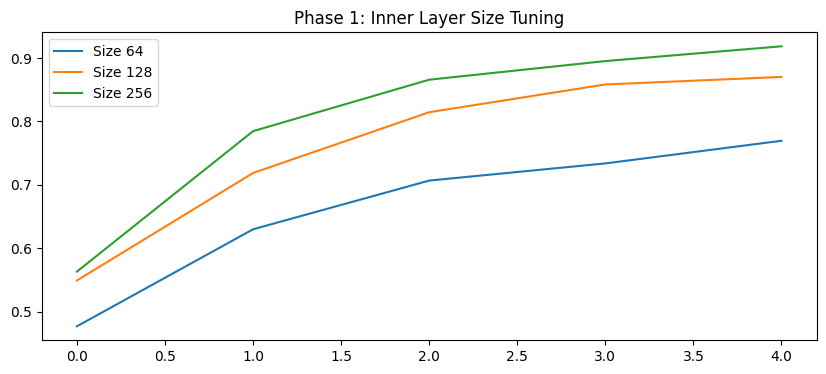

In [45]:
# Models with different inner size
sizes = [64, 128, 256]
size_scores = {}

plt.figure(figsize=(10, 4))
for s in sizes:
    m = build_tuned_model(inner_size=s, drop_rate=best_drop, lr=best_lr)
    h = m.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=weights_dict, verbose=0)
    acc = max(h.history['val_accuracy'])
    size_scores[s] = acc
    plt.plot(h.history['val_accuracy'], label=f'Size {s}')


best_size = max(size_scores, key=size_scores.get)
print(f"Inner Size = {best_size}")
plt.title('Phase 1: Inner Layer Size Tuning'); plt.legend(); plt.show()


>>> Inherited Best Size: 256, Current LR: 0.001
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.3455 - loss: 2.2308 - val_accuracy: 0.6824 - val_loss: 1.0848
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.6362 - loss: 1.0641 - val_accuracy: 0.8229 - val_loss: 0.5305
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.7363 - loss: 0.7061 - val_accuracy: 0.8959 - val_loss: 0.3602
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.7889 - loss: 0.5423 - val_accuracy: 0.8990 - val_loss: 0.3162
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.8172 - loss: 0.4597 - val_accuracy: 0.9294 - val_loss: 0.2213
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.2852 - loss: 2.4776 - val_accuracy: 0.6530 - val_loss: 1.1270
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.5654 - loss: 1.2706 - val_accuracy: 0.8031 - val_loss: 0.6325
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/

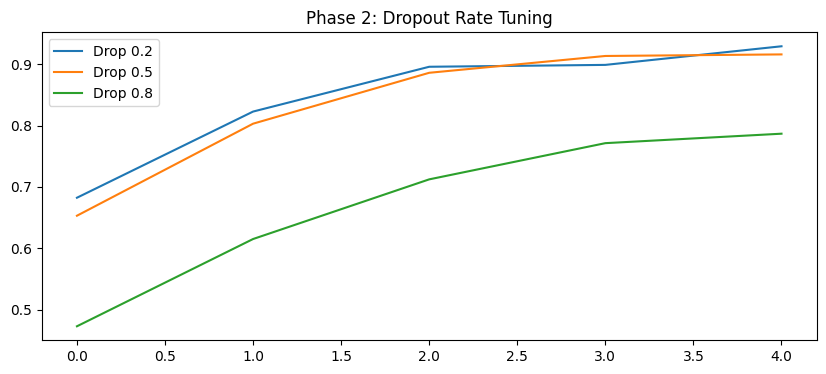

In [47]:
# Models with different dropout rates
print(f"\n>>> Inherited Best Size: {best_size}, Current LR: {best_lr}")
rates = [0.2, 0.5, 0.8]
drop_scores = {}

plt.figure(figsize=(10, 4))
for r in rates:
    m = build_tuned_model(inner_size=best_size, drop_rate=r, lr=best_lr)
    h = m.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=weights_dict, verbose=1)
    acc = max(h.history['val_accuracy'])
    drop_scores[r] = acc
    plt.plot(h.history['val_accuracy'], label=f'Drop {r}')

best_drop = max(drop_scores, key=drop_scores.get)
print(f"WINNER: Dropout Rate = {best_drop}")
plt.title('Phase 2: Dropout Rate Tuning'); plt.legend(); plt.show()


>>> Inherited Size: 256, Inherited Drop: 0.2
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.0184 - loss: 3.7708 - val_accuracy: 0.0054 - val_loss: 3.7662
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.0128 - loss: 3.7656 - val_accuracy: 0.0107 - val_loss: 3.7657
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.0095 - loss: 3.7662 - val_accuracy: 0.0061 - val_loss: 3.7630
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.0144 - loss: 3.7657 - val_accuracy: 0.0306 - val_loss: 3.7635
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.0119 - loss: 3.7656 - val_accuracy: 0.0099 - val_loss: 3.7665
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.3513 - loss: 2.1759 - val_accuracy: 0.7048 - val_loss: 0.8933
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.6496 - loss: 0.9835 - val_accuracy: 0.8542 - val_loss: 0.4755
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/ste

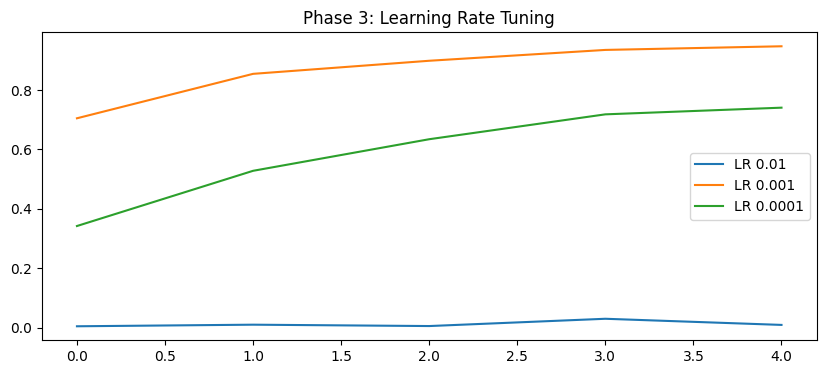

In [48]:
# Models with different learning rate
print(f"\n>>> Inherited Size: {best_size}, Inherited Drop: {best_drop}")
lrs = [0.01, 0.001, 0.0001]
lr_scores = {}

plt.figure(figsize=(10, 4))
for l in lrs:
    m = build_tuned_model(inner_size=best_size, drop_rate=best_drop, lr=l)
    h = m.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=weights_dict, verbose=1)
    acc = max(h.history['val_accuracy'])
    lr_scores[l] = acc
    plt.plot(h.history['val_accuracy'], label=f'LR {l}')

best_lr = max(lr_scores, key=lr_scores.get)
print(f"WINNER: Learning Rate = {best_lr}")
plt.title('Phase 3: Learning Rate Tuning'); plt.legend(); plt.show()

In [90]:
# Train the model with best parameter and more epochs
print(f"\n>>> Training FINAL MODEL with fully adapted parameters:")
print(f"Size: {best_size}, Drop: {best_drop}, LR: {best_lr}")

final_model = build_tuned_model(inner_size=best_size, drop_rate=best_drop, lr=best_lr)
final_history = final_model.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=weights_dict)

final_model.save('traffic_sign_model.h5')
print("\nFinal tuned model saved as traffic_sign_model.h5")


>>> Training FINAL MODEL with fully adapted parameters:
Size: 256, Drop: 0.2, LR: 0.001
Epoch 1/5


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.3237 - loss: 2.3151 - val_accuracy: 0.6626 - val_loss: 1.0962
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6262 - loss: 1.0897 - val_accuracy: 0.8381 - val_loss: 0.5147
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.7314 - loss: 0.7189 - val_accuracy: 0.8873 - val_loss: 0.3672
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7855 - loss: 0.5496 - val_accuracy: 0.9232 - val_loss: 0.2475
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.8205 - loss: 0.4410 - val_accuracy: 0.9319 - val_loss: 0.2196



Final tuned model saved as traffic_sign_model.h5


In [96]:
# Load test data
test_df = pd.read_csv('data/Test.csv')
test_df['Path'] = 'data/' + test_df['Path']
test_df['ClassId'] = test_df['ClassId'].astype(int)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col='Path',
    y_col='ClassId',
    target_size=(32, 32),
    batch_size=32,
    class_mode='raw',
    shuffle=False  
)

Found 12630 validated image filenames.


In [97]:
#Use the model 
test_loss, test_acc = final_model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8511 - loss: 0.5123
Test Accuracy: 85.11%


395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step

Classification Report:
                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.24      0.48      0.32        60
         Speed limit (30km/h)       0.87      0.67      0.76       720
         Speed limit (50km/h)       0.65      0.87      0.75       750
         Speed limit (60km/h)       0.86      0.56      0.68       450
         Speed limit (70km/h)       0.92      0.83      0.87       660
         Speed limit (80km/h)       0.58      0.65      0.61       630
  End of speed limit (80km/h)       0.98      0.91      0.94       150
        Speed limit (100km/h)       0.78      0.69      0.73       450
        Speed limit (120km/h)       0.67      0.81      0.73       450
                   No passing       0.98      0.92      0.95       480
 No passing veh over 3.5 tons       0.97      0.96      0.96       660
 Right-of-way at intersection       0.90      0.83      0.86       420
          

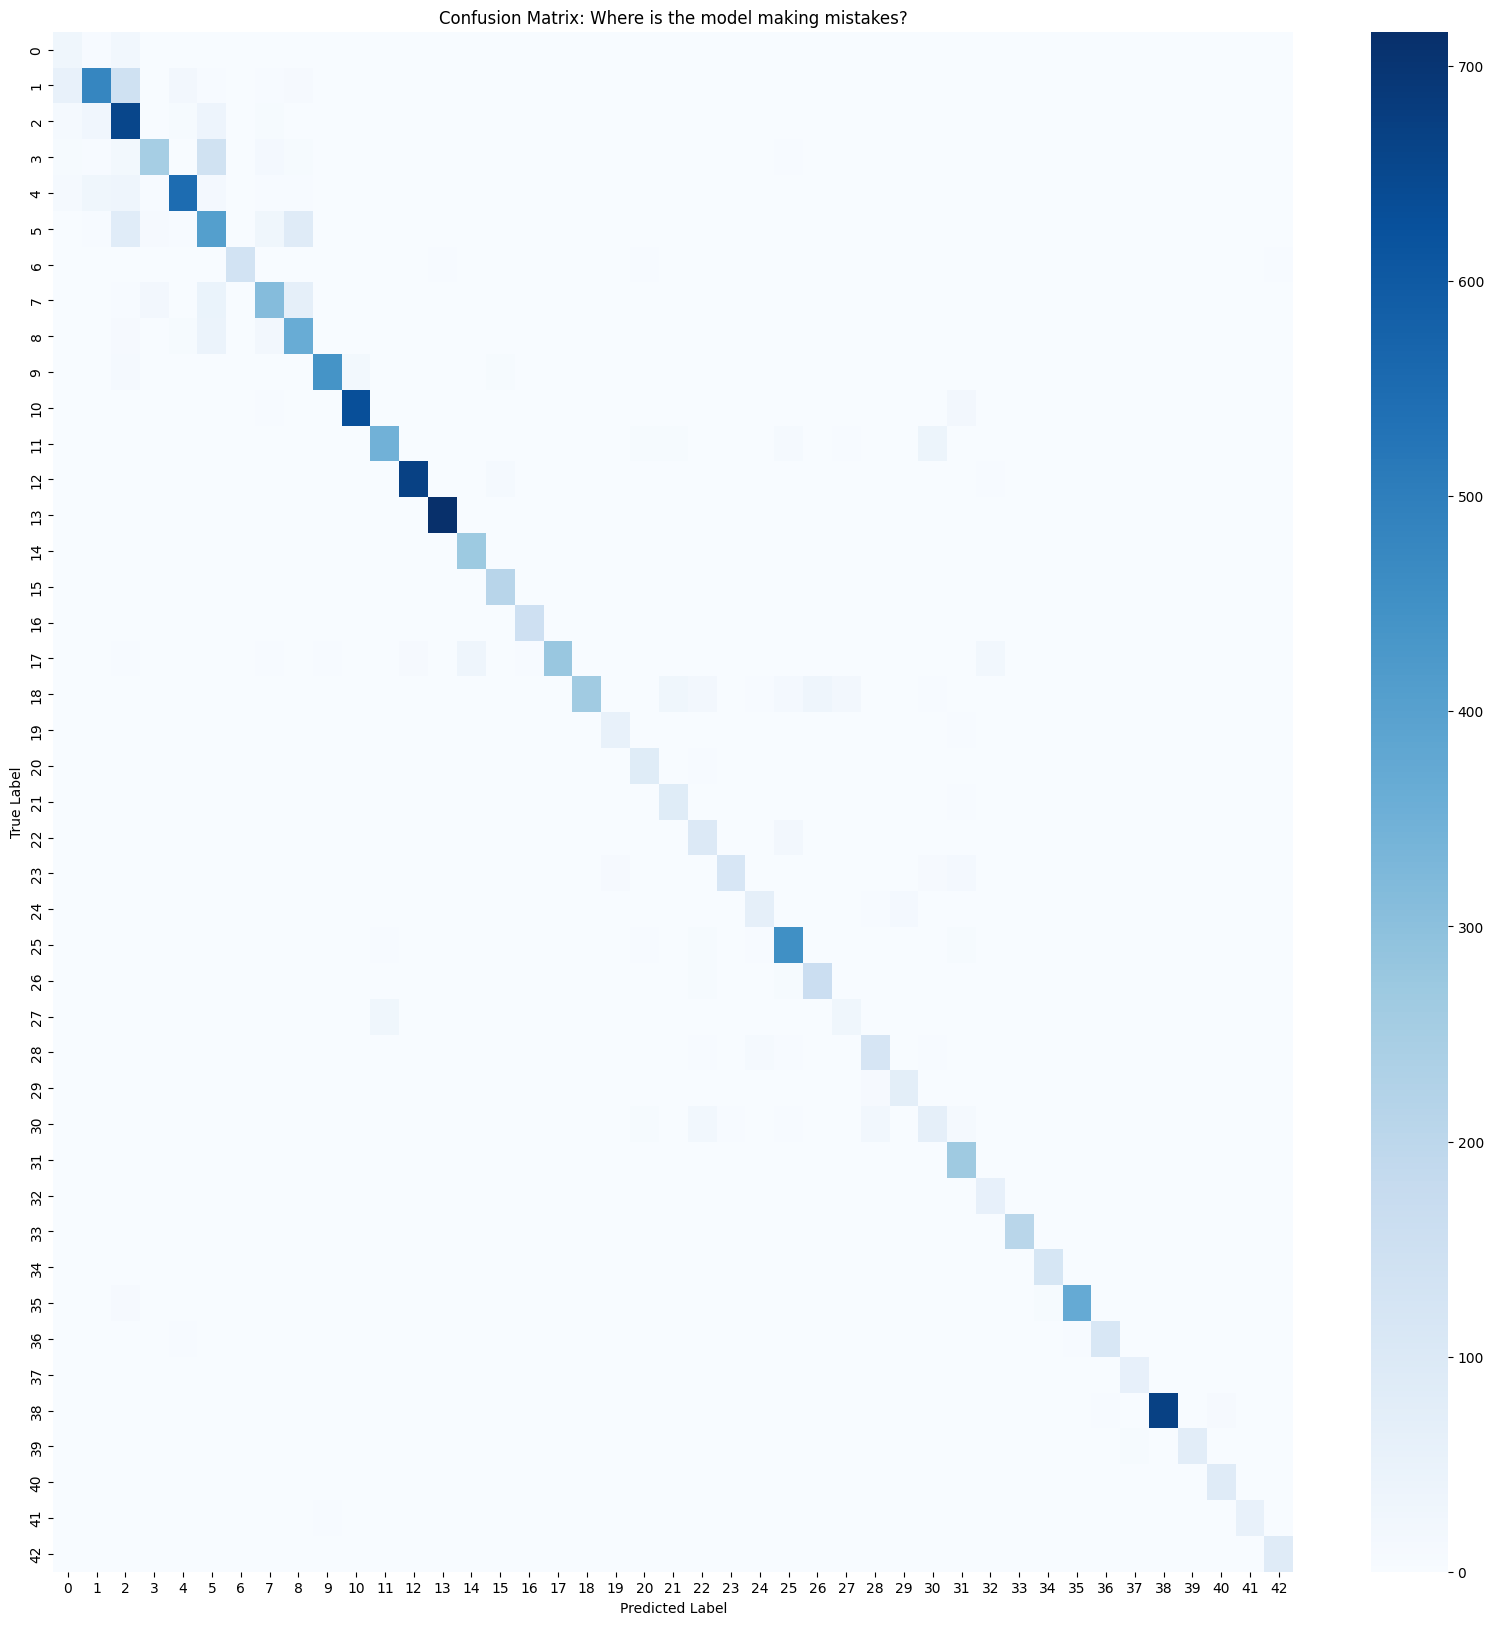

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred_probs = final_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_df['ClassId'].values

# 1. Print Classification Report
# This shows Precision, Recall, and F1-Score for the signs
target_names = [classes[i] for i in range(43)]

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# 2. Plot Confusion Matrix
plt.figure(figsize=(20, 20))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where is the model making mistakes?')
plt.show()

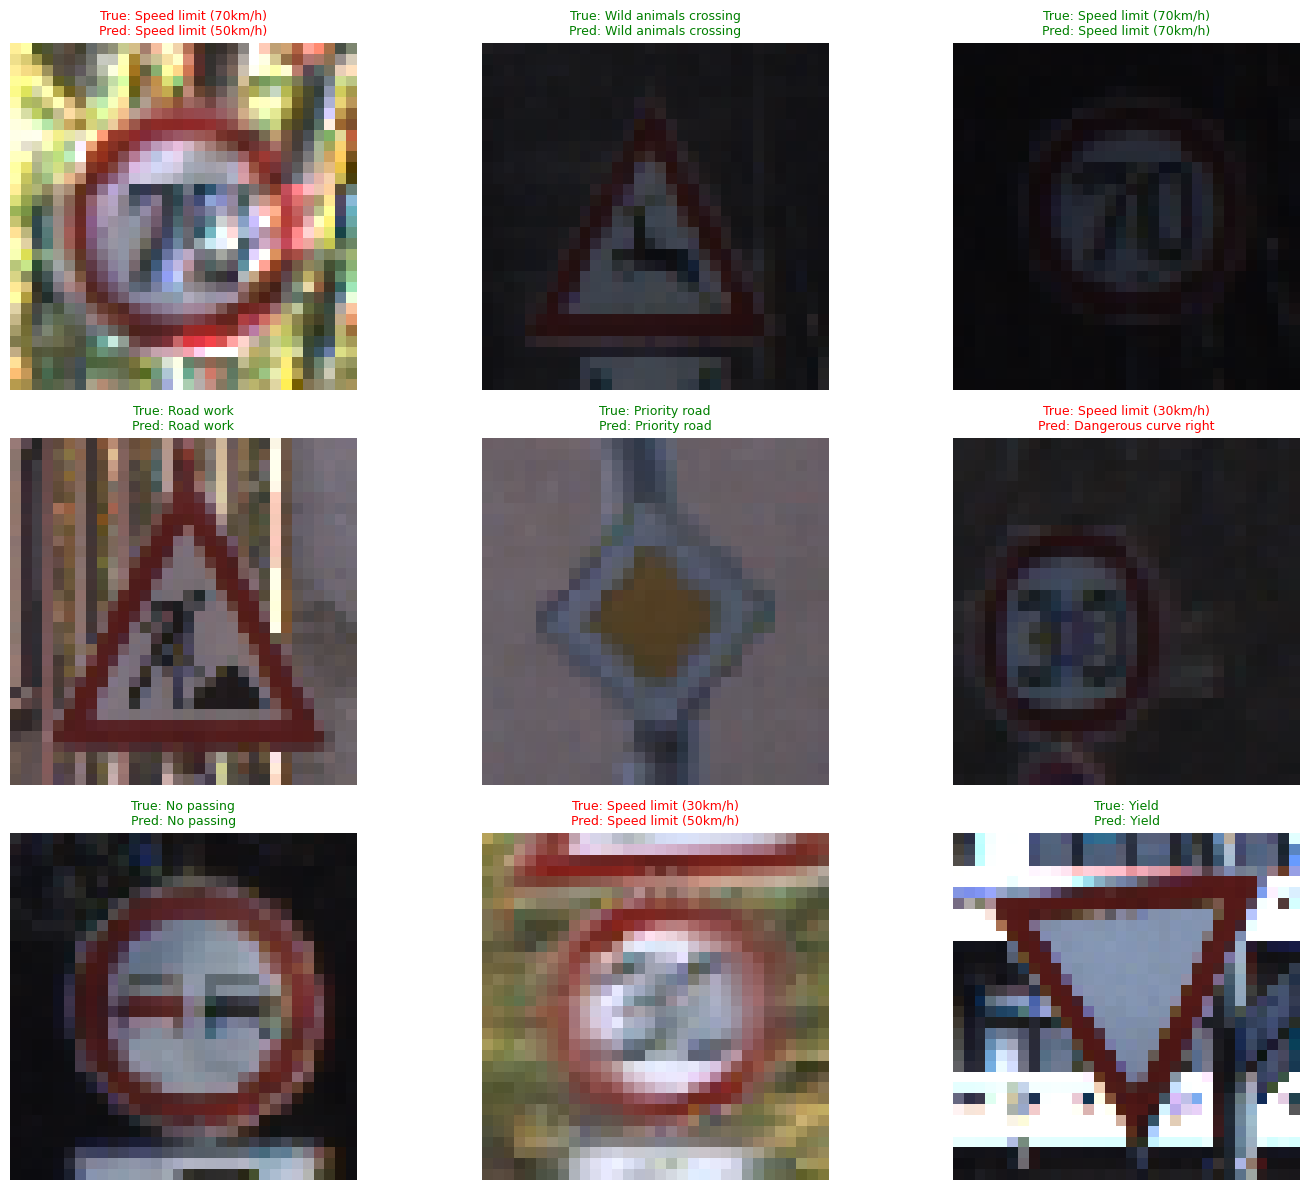

In [105]:
plt.figure(figsize=(15, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    
    # Get random image
    idx = np.random.randint(0, len(test_df))
    img_path = test_df.iloc[idx]['Path']
    true_id = int(test_df.iloc[idx]['ClassId'])
    
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred_probs = final_model.predict(img_array, verbose=0)
    pred_id = int(np.argmax(pred_probs))
    
    color = 'green' if pred_id == true_id else 'red'
    
    true_name = classes[true_id]
    pred_name = classes[pred_id]
    
    plt.imshow(img)
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()